# Load the data and generate training and testing set

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression

In [2]:
#Load the mnist dataset
mnist = fetch_openml('mnist_784')

In [3]:
x, y = mnist['data'], mnist['target']

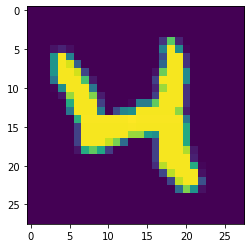

In [4]:
random_digit = x[20].reshape(28, 28)
plt.imshow(random_digit)

In [5]:
#Shuffling the dataset so that the data do not remain numerically organised
shuffled_index = np.random.permutation(70000)
x, y = x[shuffled_index], y[shuffled_index]

In [6]:
#Generate training and testing dataset
x_train, x_test = x[:60000], x[60000:]
y_train, y_test = y[:60000], y[60000:]

# Creating a 4 detector

In [7]:
y_train_4 = (y_train == '4')
y_test_4 = (y_test == '4')

In [8]:
#Build the Model
lr = LogisticRegression()
lr.fit(x_train, y_train_4)

c:\python\python383\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
#Validate
lr.predict([x[59998]])

array([ True])

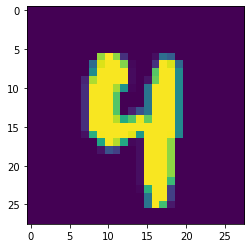

In [11]:
plt.imshow(x[59998].reshape(28, 28))

# Using own dataset

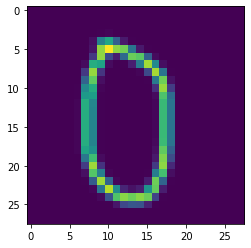

In [12]:
#Test 1
img = cv2.imread("test_images/0.png", 0)
img = cv2.GaussianBlur(img, (15, 15), 0)
img = cv2.resize(img, (28, 28), interpolation = cv2.INTER_AREA)

plt.imshow(img)

In [13]:
data = []
rows, cols = img.shape
for i in range(rows):
    for j in range(cols):
        k = img[i, j]
        data.append(k)

test_img = np.array(data)

In [14]:
#Predict the image using the model
lr.predict([test_img])

array([False])

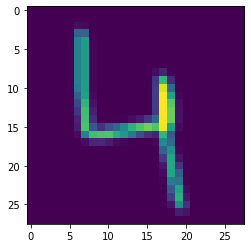

In [15]:
#Test 2
img2 = cv2.imread("test_images/4.png", 0)
img2 = cv2.GaussianBlur(img2, (15, 15), 0)
img2 = cv2.resize(img2, (28, 28), interpolation = cv2.INTER_AREA)

plt.imshow(img2)

In [16]:
data2 = []
rows2, cols2 = img2.shape
for i in range(rows2):
    for j in range(cols2):
        k = img2[i, j]
        data2.append(k)

test_img2 = np.array(data2)

In [17]:
#Predict the image using the model
lr.predict([test_img2])

array([ True])